In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import os

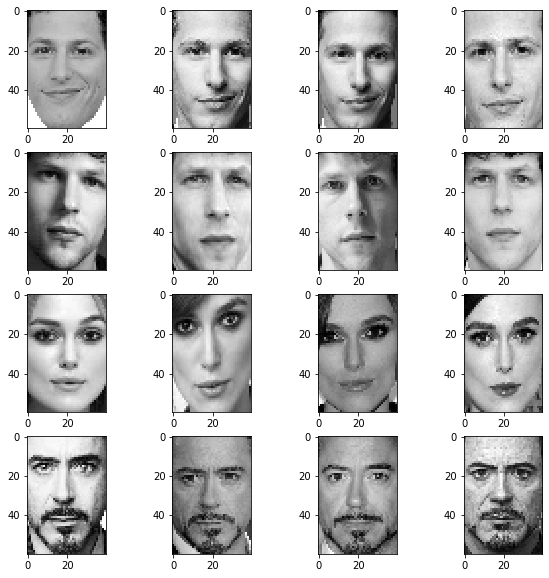

In [4]:
ax, fig = plt.subplots(4, 4, figsize=(10,10))

# Quick helper function to scale images to a uniform length in grayscale
def preprocess_face(img):
    temp = cv2.imread(img)
    temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
    temp = cv2.resize(temp, (40,60))
    return cv2.normalize(temp.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)

img_list = []

for file in glob.glob('eigenface_images/*.jpg'):    
    img_list.append(preprocess_face(file))

r = 0
c = 0

for img in img_list:
    fig[c,r].imshow(img, cmap="gray")
    
    # Controls plotting order
    if(r<3):
        r+=1
    else:
        r=0
        c+=1
        

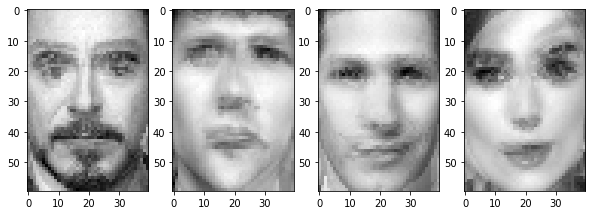

In [6]:
# Lets get the average faces for each
avg_asb = (img_list[0] + img_list[1] + img_list[2] + img_list[3])/4
avg_jeb = (img_list[4] + img_list[5] + img_list[6] + img_list[7])/4
avg_kn = (img_list[8] + img_list[9] + img_list[10] + img_list[11])/4
avg_rdj = (img_list[12] + img_list[13] + img_list[14] + img_list[15])/4

ax, fig = plt.subplots(1,4, figsize=(10,10))
fig[0].imshow(avg_rdj, cmap="gray")
fig[1].imshow(avg_jeb, cmap="gray")
fig[2].imshow(avg_asb, cmap="gray")
fig[3].imshow(avg_kn, cmap="gray")
plt.show()

In [7]:
# Make array of unrolled images 
A = []
 
for img in img_list:
    A.append(img.flatten())
    
A = np.array(A)
A.shape

(16, 2400)

In [8]:
A = A - np.mean(A)
A.shape

(16, 2400)

In [ ]:
# r = rdj_1.flatten()
# r.shape
# r1 = np.resize(r, (300,200))
# r1.shape
# plt.imshow(np.resize(r, (300,200)), cmap="gray")

In [9]:
import sys
from scipy import sparse

In [10]:
sA = sparse.csr_matrix(A)

In [11]:
print(sys.getsizeof(A))
print(sys.getsizeof(sA))

307312
56


112


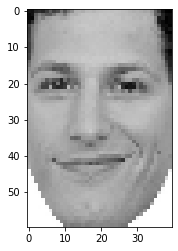

In [13]:
sAr = np.resize(sA[0].toarray(), (60,40))
plt.imshow(sAr, cmap="gray")
print(sys.getsizeof(sAr))


In [14]:
C = sA.T@A

In [15]:
U,D,V = np.linalg.svd(C)

In [19]:
V.shape

(2400, 2400)

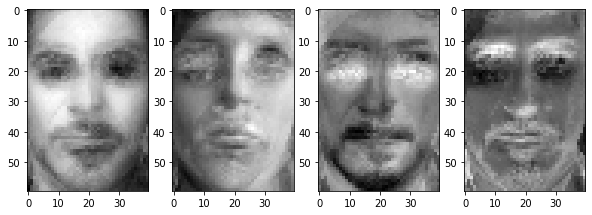

In [44]:
# Top 4 eigenfaces that are correlated with our 16 images
face1 = np.resize(V[0,:],(60,40))
face2 = np.resize(V[1,:],(60,40))
face3 = np.resize(V[2,:],(60,40))
face4 = np.resize(V[3,:],(60,40))

ax, fig = plt.subplots(1, 4, figsize=(10,10))

fig[0].imshow(face1, cmap="gray")
fig[1].imshow(face2, cmap="gray")
fig[2].imshow(face3, cmap="gray")
fig[3].imshow(face4, cmap="gray")


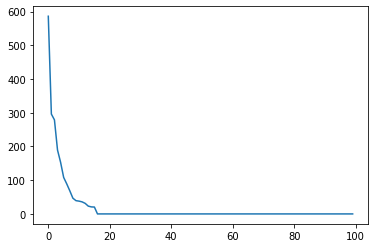

In [37]:
# We can see that it levels off around 20
plt.plot(D[:100])
plt.show()

In [66]:
proj_asb = np.resize(avg_asb, (1,60*40))@V
proj_jeb = np.resize(avg_jeb, (1,60*40))@V
proj_kn = np.resize(avg_kn, (1,60*40))@V
proj_rdj = np.resize(avg_rdj, (1,60*40))@V


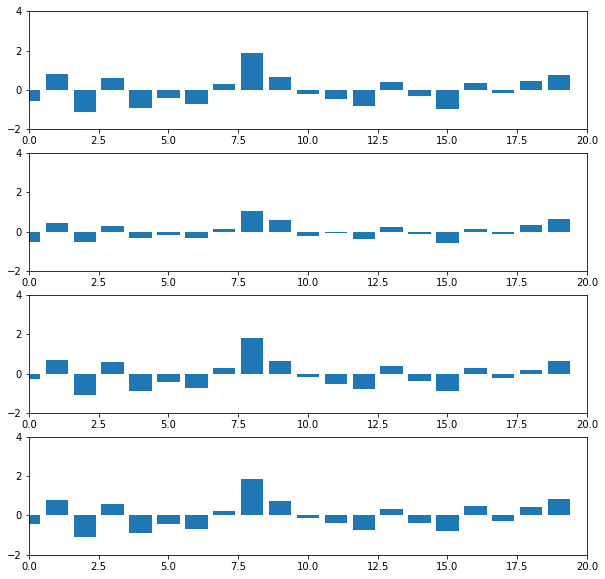

In [81]:
# First 20 
ax, fig = plt.subplots(4, 1, figsize=(10,10))

# ax.set_ylim(-2, 2) # set y limits of plot
# ax.set_xlim(-1,21) # set x limits of plot
fig[0].bar(np.arange(20),proj_asb[0,:20])
fig[1].bar(np.arange(20),proj_jeb[0,:20])
fig[2].bar(np.arange(20),proj_kn[0,:20])
fig[3].bar(np.arange(20),proj_rdj[0,:20])

for i in range(4):
    fig[i].set_xlim([0, 20])
    fig[i].set_ylim([-2, 4])